In [1]:
!ls

model_architecture.py  sample_data  train_test.py


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
from model_architecture import *
from train_test import *

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
batch_size = 256
num_workers = 1
pin_memory = True
input_size = (3,32,32)

In [5]:
from __future__ import print_function
import torch
from torchvision import datasets, transforms
import sys

torch.manual_seed(1)
#kwargs = {'num_workers': config.num_workers, 'pin_memory': config.pin_memory} if config.use_cuda else {}
kwargs = {'num_workers': num_workers, 'pin_memory': pin_memory} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.RandomCrop(32, padding=4),
                       transforms.RandomHorizontalFlip(),
                       transforms.RandomRotation((-8.0, 8.0)),                                                 
                       #transforms.RandomRotation((-8.0, 8.0), fill=(1,)),
                       transforms.ToTensor(),
                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
                   ])),
    #batch_size=config.batch_size, shuffle=True, **kwargs)
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('../data', train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ])),
    #batch_size=config.batch_size, shuffle=True, **kwargs)
    batch_size=batch_size, shuffle=True, **kwargs)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


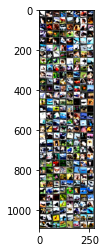

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.49139968     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
from __future__ import print_function
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import sys


print(model_summary(Net(1), input_size))

accu = []
loss_test = []


model_ = Net(BN_flag=1).to(device)
optimizer = optim.SGD(model_.parameters(), lr=0.016, momentum=0.9)
scheduler = StepLR(optimizer, step_size=2, gamma=0.92)

valid_acc = []
loss_test_ = []
l1_regularization = [0, 0]
for epoch in range(1, 26):
    train(model_, device, train_loader, optimizer, epoch, l1_regularization)
    scheduler.step()
    valid_a, valid_l = test(model_, device, test_loader)
    # Appending to loss and accuracy lists
    valid_acc.append(valid_a)
    loss_test_.append(valid_l)

accu.append(valid_acc)
loss_test.append(loss_test_)

import pickle
with open("Model_Params.pickle","wb") as f:
    pickle.dump(accu, f)
    pickle.dump(loss_test, f)

/content/model_architecture.py:181: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
  0%|          | 0/196 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
    GhostBatchNorm-2           [-1, 32, 32, 32]              64
            Conv2d-3           [-1, 32, 32, 32]           9,248
    GhostBatchNorm-4           [-1, 32, 32, 32]              64
           Dropout-5           [-1, 32, 32, 32]               0
         MaxPool2d-6           [-1, 32, 16, 16]               0
            Conv2d-7           [-1, 16, 18, 18]             528
    GhostBatchNorm-8           [-1, 16, 18, 18]              32
           Dropout-9           [-1, 16, 18, 18]               0
           Conv2d-10           [-1, 64, 18, 20]           3,136
   GhostBatchNorm-11           [-1, 64, 18, 20]             128
          Dropout-12           [-1, 64, 18, 20]               0
           Conv2d-13           [-1, 64, 20, 20]          12,352
   GhostBatchNorm-14           [-1, 64,

Epoch: 1,LR: 0.016.
Train set: train Average loss: 1.3554, train_Accuracy: 16585/50000 (33.1700%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.5889, Accuracy: 4169/10000 (41.6900%)



Epoch: 2,LR: 0.016.
Train set: train Average loss: 1.2627, train_Accuracy: 25791/50000 (51.5820%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2233, Accuracy: 5520/10000 (55.2000%)



Epoch: 3,LR: 0.01472.
Train set: train Average loss: 1.1090, train_Accuracy: 29119/50000 (58.2380%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2066, Accuracy: 5735/10000 (57.3500%)



Epoch: 4,LR: 0.01472.
Train set: train Average loss: 0.9218, train_Accuracy: 31209/50000 (62.4180%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.1526, Accuracy: 6064/10000 (60.6400%)



Epoch: 5,LR: 0.013542400000000001.
Train set: train Average loss: 1.0421, train_Accuracy: 32923/50000 (65.8460%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.9997, Accuracy: 6508/10000 (65.0800%)



Epoch: 6,LR: 0.013542400000000001.
Train set: train Average loss: 0.8855, train_Accuracy: 33911/50000 (67.8220%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.8600, Accuracy: 6975/10000 (69.7500%)



Epoch: 7,LR: 0.012459008000000002.
Train set: train Average loss: 0.8908, train_Accuracy: 34719/50000 (69.4380%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.7949, Accuracy: 7214/10000 (72.1400%)



Epoch: 8,LR: 0.012459008000000002.
Train set: train Average loss: 0.6292, train_Accuracy: 35515/50000 (71.0300%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.8730, Accuracy: 7005/10000 (70.0500%)



Epoch: 9,LR: 0.011462287360000002.
Train set: train Average loss: 0.8621, train_Accuracy: 36492/50000 (72.9840%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.8075, Accuracy: 7342/10000 (73.4200%)



Epoch: 10,LR: 0.011462287360000002.
Train set: train Average loss: 0.6603, train_Accuracy: 36828/50000 (73.6560%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.7332, Accuracy: 7536/10000 (75.3600%)



Epoch: 11,LR: 0.010545304371200001.
Train set: train Average loss: 0.6013, train_Accuracy: 37538/50000 (75.0760%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6889, Accuracy: 7692/10000 (76.9200%)



Epoch: 12,LR: 0.010545304371200001.
Train set: train Average loss: 0.7427, train_Accuracy: 37855/50000 (75.7100%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6859, Accuracy: 7703/10000 (77.0300%)



Epoch: 13,LR: 0.009701680021504002.
Train set: train Average loss: 0.6315, train_Accuracy: 38460/50000 (76.9200%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6515, Accuracy: 7841/10000 (78.4100%)



Epoch: 14,LR: 0.009701680021504002.
Train set: train Average loss: 0.7749, train_Accuracy: 38790/50000 (77.5800%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6806, Accuracy: 7819/10000 (78.1900%)



Epoch: 15,LR: 0.008925545619783683.
Train set: train Average loss: 0.5724, train_Accuracy: 39126/50000 (78.2520%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6512, Accuracy: 7882/10000 (78.8200%)



Epoch: 16,LR: 0.008925545619783683.
Train set: train Average loss: 0.4441, train_Accuracy: 39418/50000 (78.8360%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5980, Accuracy: 8049/10000 (80.4900%)



Epoch: 17,LR: 0.008211501970200989.
Train set: train Average loss: 0.5542, train_Accuracy: 39673/50000 (79.3460%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6136, Accuracy: 7997/10000 (79.9700%)



Epoch: 18,LR: 0.008211501970200989.
Train set: train Average loss: 0.7381, train_Accuracy: 39879/50000 (79.7580%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5501, Accuracy: 8191/10000 (81.9100%)



Epoch: 19,LR: 0.007554581812584909.
Train set: train Average loss: 0.5597, train_Accuracy: 40247/50000 (80.4940%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5635, Accuracy: 8167/10000 (81.6700%)



Epoch: 20,LR: 0.007554581812584909.
Train set: train Average loss: 0.6277, train_Accuracy: 40382/50000 (80.7640%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5403, Accuracy: 8260/10000 (82.6000%)



Epoch: 21,LR: 0.006950215267578117.
Train set: train Average loss: 0.5575, train_Accuracy: 40621/50000 (81.2420%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5406, Accuracy: 8273/10000 (82.7300%)



Epoch: 22,LR: 0.006950215267578117.
Train set: train Average loss: 0.5297, train_Accuracy: 40820/50000 (81.6400%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5307, Accuracy: 8289/10000 (82.8900%)



Epoch: 23,LR: 0.006394198046171868.
Train set: train Average loss: 0.4581, train_Accuracy: 40999/50000 (81.9980%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5375, Accuracy: 8296/10000 (82.9600%)



Epoch: 24,LR: 0.006394198046171868.
Train set: train Average loss: 0.3528, train_Accuracy: 41081/50000 (82.1620%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5787, Accuracy: 8132/10000 (81.3200%)



Epoch: 25,LR: 0.005882662202478119.
Train set: train Average loss: 0.6371, train_Accuracy: 41396/50000 (82.7920%)




Test set: Average loss: 0.5212, Accuracy: 8283/10000 (82.8300%)



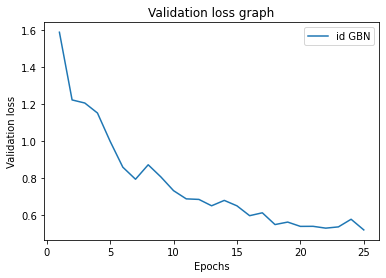

In [8]:
import matplotlib.pyplot as plt

x = [i for i in range(1,26)]
y = loss_test
Modelgraph = ['GBN']

plt.title("Validation loss graph")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
#plt.figure(figsize=(10,10))

for i in range(len(y)):
    plt.plot(x,y[i],label = 'id %s'%Modelgraph[i])

plt.legend()
#plt.show()
plt.savefig('Validation loss graph')

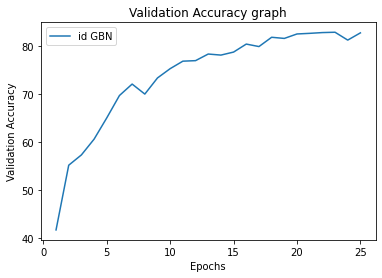

<Figure size 432x288 with 0 Axes>

In [9]:
x = [i for i in range(1,26)]
y = accu
Modelgraph = ['GBN']


plt.title("Validation Accuracy graph")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")


for i in range(len(y)):
    plt.plot(x,y[i],label = 'id %s'%Modelgraph[i])

plt.legend()
plt.show()
plt.savefig('Validation Accuracy graph_')